## Simulation 2D

In [1]:
#Import
from diffractio import degrees, mm, plt, np, um

from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

from diffractio.utils_drawing import draw_several_fields
from diffractio.utils_optics import beam_width_1D, FWHM2D, MTF_ideal, MTF_parameters,FWHM1D, beam_width_2D

from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

import math
import matplotlib.pyplot as plt
import matplotlib as mpl

#Output_folder = 'Outputs'
#Output_folder_Colli = 'Outputs/Collimatedbeam'



from PIL import Image
from PIL import ImageOps
mpl.rcParams.update({'font.size':10})


## Parameters 

In [2]:
#Gaussian Beam

wavelength =  0.6328 * um
w0 = 0.35821143204247774 * mm # mm https://www.thorlabs.com/thorproduct.cfm?partnumber=HNL100R#ad-image-0

#Sample Size
num_sample=  6000


#Define Second Lens 

second_lens_diameter = 25.4 * mm

max_beam_width = 3*mm
range_of_second_lens = np.linspace(-max_beam_width/2 , max_beam_width/2 , num_sample)

focal_length_second_lens = 200 * mm

second_lens = Scalar_mask_XY(x=range_of_second_lens,y=range_of_second_lens, wavelength=wavelength)
second_lens.lens(r0=(0.0,0.0), focal=focal_length_second_lens, radius=second_lens_diameter/ 2)


#Define First Lens

first_lens_diameter = 25.4 * mm
focal_length_first_lens = 50 * mm

first_lens = Scalar_mask_XY(x=range_of_second_lens, y=range_of_second_lens,wavelength=wavelength)
first_lens.lens(r0=(0.0,0.0), focal=focal_length_first_lens, radius=first_lens_diameter/ 2)


## Laser Output

In [7]:
#Laser Output

laser_output = Scalar_source_XY(x=range_of_second_lens, y=range_of_second_lens, wavelength=wavelength)
laser_output.gauss_beam(A=1, r0=(0 * um, 0 * um), z0=0, w0=(w0 , w0 ), phi=0 * degrees, theta=0 * degrees)
fwhm_beam_L = FWHM2D(laser_output.x,laser_output.y,laser_output.intensity(),has_draw= False)
fwhm_beam_L
#laser_output.draw(kind='intensity', has_colorbar='vertical')

(421.77566934395077, 421.77566934395077)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 960x720 with 0 Axes>

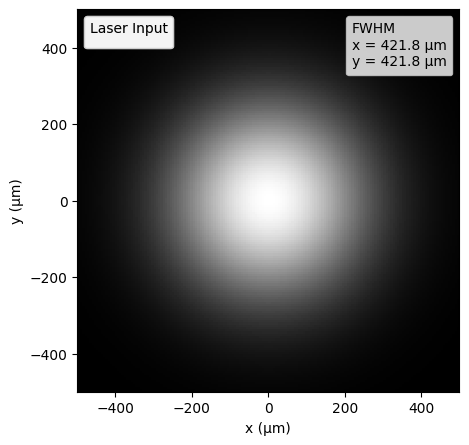

In [12]:
plt.figure(num=None, figsize=(8, 6), dpi=120)
laser_output.draw(colormap_kind="gist_gray")
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")

plt.xlim(-500,500)
plt.ylim(-500,500)

legend1 = plt.legend(
    title=f"FWHM\nx = {fwhm_beam_L[0]:.1f} µm\ny = {fwhm_beam_L[1]:.1f} µm",
    labelspacing=0.1
)

# Create a new legend for specific lines
legend2 = plt.legend(title='Laser Input', loc='upper left')

# Add the second legend to the current axes
plt.gca().add_artist(legend2)


# Add the first legend to the current axes
plt.gca().add_artist(legend1)


## Without 50mm Lens Without 200 mm Lens

In [9]:
L_total=3068*mm

beam_L = laser_output.RS(z=L_total)
fwhm_beam_L = FWHM2D(beam_L.x,beam_L.y,beam_L.intensity(),has_draw= False)
fwhm_beam_L

(2074.5887323740176, 2074.5887323740176)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


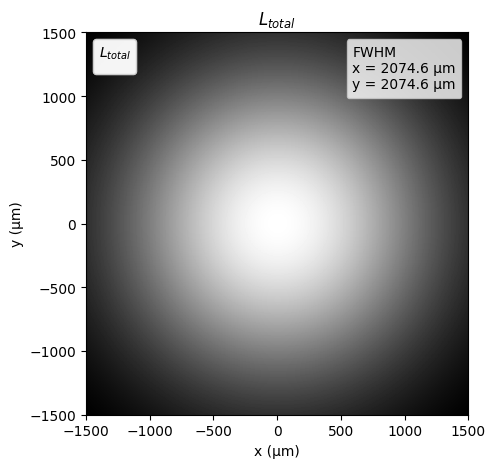

In [20]:
beam_L.draw(kind='intensity', colormap_kind="gist_gray")
plt.title(r'$L_{total}$')
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")

legend1 = plt.legend(
    title=f"FWHM\nx = {fwhm_beam_L[0]:.1f} µm\ny = {fwhm_beam_L[1]:.1f} µm",
    labelspacing=0.1
)


# Add the first legend to the current axes
plt.gca().add_artist(legend1)


# Create a new legend for specific lines
legend2 = plt.legend(title=r'$L_{total}$', loc='upper left')

# Add the second legend to the current axes
plt.gca().add_artist(legend2)

#Saving photo

#file_name = "wout_50mm_lens_wout_200mm_lens_sim_2D.txt"
#plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight', pad_inches=0.01)

## Before BS 

In [14]:
L1=1800*mm
L2=100*mm
beam_L = laser_output.RS(z=L1)
fwhm_beam_L = FWHM2D(beam_L.x, beam_L.y, beam_L.intensity(), has_draw= False)
fwhm_beam_L

(1264.1887910078567, 1264.1887910078565)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


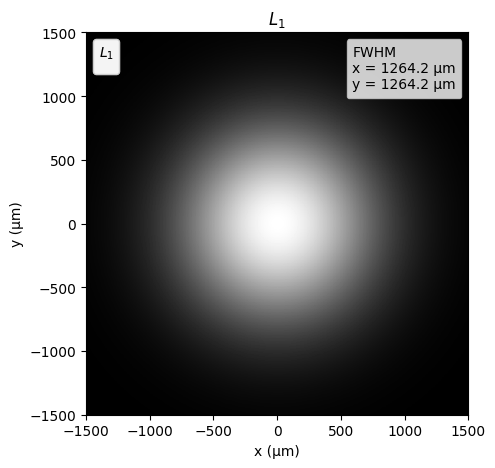

In [15]:
beam_L.draw(kind='intensity', colormap_kind="gist_gray")
plt.title(r'$L_{1}$')
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")

legend1 = plt.legend(
    title=f"FWHM\nx = {fwhm_beam_L[0]:.1f} µm\ny = {fwhm_beam_L[1]:.1f} µm",
    labelspacing=0.1
)


# Add the first legend to the current axes
plt.gca().add_artist(legend1)


# Create a new legend for specific lines
legend2 = plt.legend(title=r'$L_{1}$', loc='upper left')

# Add the second legend to the current axes
plt.gca().add_artist(legend2)
#Saving Photo
#file_name = "before_bs_sim_2D.txt"
#plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

In [16]:
del beam_L

## At 50mm Lens

In [17]:
D1=363*mm
L2=100*mm

at_objective = laser_output.RS(z=L1+L2+D1)
fwhm_at_objective = FWHM2D(at_objective.x,at_objective.y,at_objective.intensity(),has_draw= False)
fwhm_at_objective

(1556.5287125304735, 1556.5287125304735)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


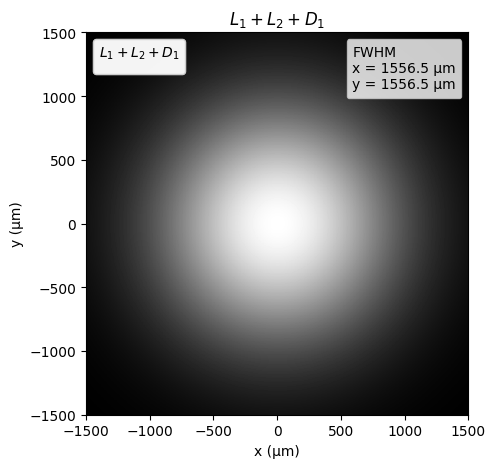

In [19]:
at_objective.draw(kind='intensity', colormap_kind="gist_gray")
plt.title(r'$L_{1}+L_{2}+D_{1}$')
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")


legend1 = plt.legend(
    title=f"FWHM\nx = {fwhm_at_objective[0]:.1f} µm\ny = {fwhm_at_objective[1]:.1f} µm",
    labelspacing=0.1
)


# Add the first legend to the current axes
plt.gca().add_artist(legend1)


# Create a new legend for specific lines
legend2 = plt.legend(title=r'$L_{1}+L_{2}+D_{1}$', loc='upper left')

# Add the second legend to the current axes
plt.gca().add_artist(legend2)
#Saving Photo
#file_name = "at_50mm_lens_sim_2D.txt"
#plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

In [20]:
del at_objective

## Without 50mm lens with 200mm Lens 

In [10]:
L_total=3068*mm

shift_in_focal_length_second_lens = 14.3*mm

beam_before_second_lens = laser_output.RS(z=L_total - focal_length_second_lens - shift_in_focal_length_second_lens)
at_second_lens = beam_before_second_lens * second_lens

del beam_before_second_lens

without_first_lens = at_second_lens.RS(z= focal_length_second_lens + shift_in_focal_length_second_lens)

fwhm_without_first_lens = FWHM2D(without_first_lens.x,without_first_lens.y,without_first_lens.intensity(),has_draw= False)
fwhm_without_first_lens

(40.07070940645394, 40.07070940645394)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 960x720 with 0 Axes>

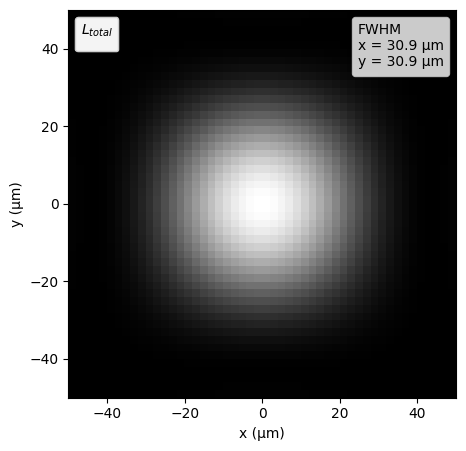

In [11]:
without_first_lens.cut_resample(x_limits=(-50 * um, 50 * um),
                y_limits=(-50 * um, 50 * um),
                num_points=(50, 50),
                new_field=False)

plt.figure(num=None, figsize=(8, 6), dpi=120)
without_first_lens.draw(colormap_kind="gist_gray")
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")

legend1 = plt.legend(title= "FWHM\nx = 30.9 µm\ny = 30.9 µm",labelspacing=0.1)

# Add the first legend to the current axes
plt.gca().add_artist(legend1)



# Create a new legend for specific lines
legend2 = plt.legend(title=r'$L_{total}$', loc='upper left')

# Add the second legend to the current axes
plt.gca().add_artist(legend2)




#Saving Photo
#file_name = "wout_50mm_lens_200mm_lens_sim_2D.txt"
#plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight',pad_inches=0.01)


### Rearranging the plot 

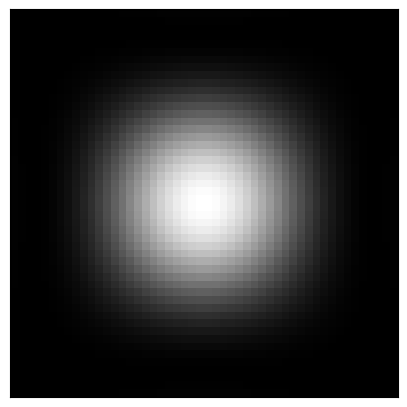

In [12]:
#Removing axes from diffractio draw and getting only the image

without_first_lens.draw(colormap_kind="gist_gray")

a = plt.gca()
 
# set visibility of x-axis as False
xax = a.axes.get_xaxis()
xax = xax.set_visible(False)
 
# set visibility of y-axis as False
yax = a.axes.get_yaxis()
yax = yax.set_visible(False)

#Saving Photo
file_name = "wout_50mm_lens_200mm_lens_sim_2D.txt"
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"))

In [13]:
# Opening image and cropping 

img = Image.open(r"G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically_Thin_Optical_Elements\data\Beam_Propagation\2023-07-20\Outputs\wout_50mm_lens_200mm_lens_sim_2D.png")
img.load()
imageSize = img.size  
invert_im = img.convert("RGB") 
# invert image (so that white is 0)
invert_im = ImageOps.invert(invert_im)
imageBox = invert_im.getbbox()
cropped=img.crop(imageBox)    
cropped.save(r"G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically_Thin_Optical_Elements\data\Beam_Propagation\2023-07-20\Outputs\wout_50mm_lens_200mm_lens_sim_2D.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


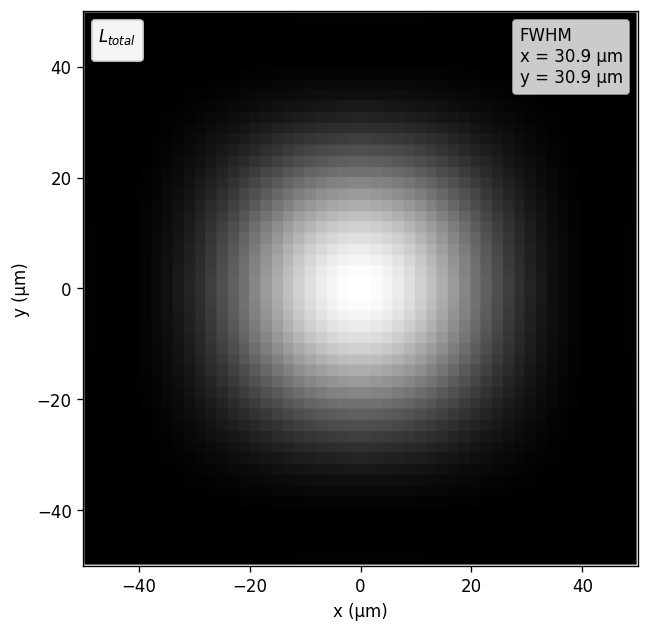

In [19]:
fig, ax = plt.subplots(figsize=(8,6),dpi=120)
im1 = Image.open(r"G:\.shortcut-targets-by-id\1tsUo0iTGNqbzWct6mSScJrKRyYGHM7i-\Optics_of_2D_Materials\Python_Coding\Atomically_Thin_Optical_Elements\data\Beam_Propagation\2023-07-20\Outputs\wout_50mm_lens_200mm_lens_sim_2D.png") 
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")


ax.imshow(im1 ,extent=[-50,50,-50,50])#Setting axes


legend1 = plt.legend(title= "FWHM\nx = 30.9 µm\ny = 30.9 µm",labelspacing=0.1)

    # Add the first legend to the current axes
plt.gca().add_artist(legend1)


# Create a new legend for specific lines
legend2 = plt.legend(title=r'$L_{total}$', loc='upper left')

# Add the second legend to the current axes
plt.gca().add_artist(legend2)


#Saving Photo
file_name = "1.txt"
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight',pad_inches=0.01)


In [17]:
del without_first_lens

## After 50mm Lens

In [10]:
shift_in_focal_length_first_lens = 0.92*mm
L1=1800*mm
L2=100*mm
D1=363*mm
at_objective = laser_output.RS(z=L1+L2+D1)
at_first_lens = at_objective * first_lens
at_focus_by_first_lens = at_first_lens.RS(z= focal_length_first_lens + shift_in_focal_length_first_lens)

In [18]:
fwhm_at_focus_by_first_lens = FWHM2D(at_focus_by_first_lens.x,at_focus_by_first_lens.y,at_focus_by_first_lens.intensity(),has_draw= False)


In [19]:
fwhm_at_focus_by_first_lens

(9.555264445837565, 9.555264445837565)

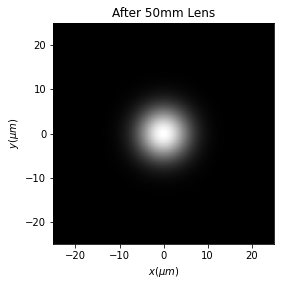

In [31]:
at_focus_by_first_lens.cut_resample(x_limits=(-25 * um, 25 * um),
                y_limits=(-25 * um, 25 * um),
                num_points=(512, 512),
                new_field=False)


at_focus_by_first_lens.draw(kind='intensity', colormap_kind="gist_gray")
plt.title("After 50mm Lens")

#Saving Photo
file_name = "after_50mm_lens_sim_2D.txt"
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')


In [32]:
del at_focus_by_first_lens

##  50mm Lens with 200mm Lens Sim

In [8]:
L1=1800*mm
L2=100*mm
D1=363*mm
L_total=3068*mm
shift_in_focal_length_first_lens = -0.047*mm
shift_in_focal_length_second_lens = 14.3*mm

D2=L_total-L1-L2-2*(D1)-2*(focal_length_first_lens + shift_in_focal_length_first_lens)-(focal_length_second_lens + shift_in_focal_length_second_lens)


print("D2 = %.2f mm" % (D2/1000))
print("D1 = %.2f mm" % (D1/1000))

D2 = 127.79 mm
D1 = 363.00 mm


In [10]:


at_objective = laser_output.RS(z=L1+L2+D1)
at_first_lens = at_objective * first_lens

first_lens_2f = at_first_lens.RS(z=2*(focal_length_first_lens + shift_in_focal_length_first_lens ))
del at_first_lens
first_lens_twice = first_lens_2f * first_lens
del first_lens_2f

before_second_lens = first_lens_twice.RS(z=D1+D2)

at_second_lens = before_second_lens * second_lens
del first_lens_twice
after_second_lens = at_second_lens.RS(z=focal_length_second_lens + shift_in_focal_length_second_lens )
del at_second_lens

fwhm_after_second_lens = FWHM2D(after_second_lens.x,after_second_lens.y,after_second_lens.intensity(),has_draw= False)


In [11]:
fwhm_after_second_lens

(39.85164169557629, 39.85164169557629)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 960x720 with 0 Axes>

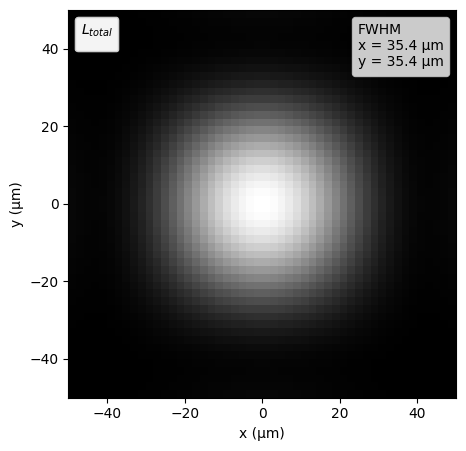

In [12]:
after_second_lens.cut_resample(x_limits=(-50 * um, 50 * um),
                y_limits=(-50 * um, 50 * um),
                num_points=(50, 50),
                new_field=False)


plt.figure(num=None, figsize=(8, 6), dpi=120)
after_second_lens.draw(colormap_kind="gist_gray")
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")

legend1 = plt.legend(title= "FWHM\nx = 35.4 µm\ny = 35.4 µm",labelspacing=0.1)

    # Add the first legend to the current axes
plt.gca().add_artist(legend1)



# Create a new legend for specific lines
legend2 = plt.legend(title=r'$L_{total}$', loc='upper left')

# Add the second legend to the current axes
plt.gca().add_artist(legend2)


#Saving Photo
file_name = "50mm_lens_200mm_lens_sim_2D.txt"
plt.savefig(f"{Output_folder}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

# Application

In [8]:
# Parameters 

#Gaussian Beam

wavelength =  0.6328 * um

fwhm_at_50mm_lens = 1555*um
w0 = 0.8493218* fwhm_at_50mm_lens

#Sample Size
num_sample=  6000


#Second Lens 

second_lens_diameter = 25.4 * mm

max_beam_width =4 *mm
range_of_second_lens = np.linspace(-max_beam_width/2 , max_beam_width/2 , num_sample)

focal_length_second_lens = 200 * mm

second_lens = Scalar_mask_XY(x=range_of_second_lens,y=range_of_second_lens, wavelength=wavelength)
second_lens.lens(r0=(0.0,0.0), focal=focal_length_second_lens, radius=second_lens_diameter/ 2)


#First Lens

first_lens_diameter = 50 * mm
focal_length_first_lens = 50 * mm

first_lens = Scalar_mask_XY(x=range_of_second_lens, y=range_of_second_lens,wavelength=wavelength)
first_lens.lens(r0=(0.0,0.0), focal=focal_length_first_lens, radius=first_lens_diameter/ 2)

# Lens

lens_diameter = 1.14 * mm
focal_length_lens = 720 * um

lens = Scalar_mask_XY(x=range_of_second_lens, y=range_of_second_lens,wavelength=wavelength)
lens.lens(r0=(0.0,0.0), focal=focal_length_lens, radius=lens_diameter/ 2)

In [9]:
#Laser Output

collimated_beam = Scalar_source_XY(x=range_of_second_lens, y=range_of_second_lens, wavelength=wavelength)
collimated_beam.gauss_beam(A=1, r0=(0 * um, 0 * um), z0=0, w0=(w0 , w0 ), phi=0 * degrees, theta=0 * degrees)

#laser_output.draw(kind='intensity', has_colorbar='vertical')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 960x720 with 0 Axes>

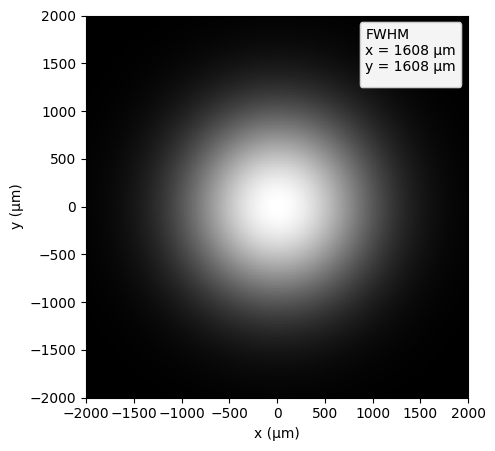

In [10]:
plt.figure(num=None, figsize=(8, 6), dpi=120)
collimated_beam.draw(colormap_kind="gray")
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")

legend1 = plt.legend(title= "FWHM\nx = 1555 µm\ny = 1555 µm")

    # Add the first legend to the current axes
plt.gca().add_artist(legend1)




#Saving Photo
file_name = "ideal_lens_setup_initial_beam.txt"
plt.savefig(f"{Output_folder_Colli}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

## With Aspheric Lens

In [ ]:
lens_ratio = 2
k = -0.96307
R = 0.840660*mm
Diameter= 1.14*mm

a4= -9.476566 * 10** -11
a6= -2.790461 * 10** -15
a8= -5.415580 * 10** -24


a=[a4*lens_ratio**3, a6*lens_ratio**5, a8*lens_ratio**7] # https://www.thorlabs.com/thorproduct.cfm?partnumber=354140




aspheric_lens =Scalar_mask_XY(x=range_of_second_lens, y=range_of_second_lens,wavelength=wavelength)
aspheric_lens.aspheric(r0=(0,0), c=1 / (R/lens_ratio), k=k, a=a, n0=1.5871, n1=1, radius=0.5*Diameter/lens_ratio )

aspheric_lens.draw()

at_aspheric = collimated_beam * aspheric_lens
aspheric_2f = at_aspheric.RS(z= 2*720*um,verbose=False)

aspheric_2f.draw()

In [4]:
shift_in_focal_length_first_lens = -0.035*mm
shift_in_focal_length_second_lens =- 0.11*mm

D1=125.86* mm
D2=363.00* mm

x =720*um

at_first_lens = collimated_beam * first_lens
first_lens_f = at_first_lens.RS(z=1*(focal_length_first_lens + shift_in_focal_length_first_lens ),verbose=True)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 960x720 with 0 Axes>

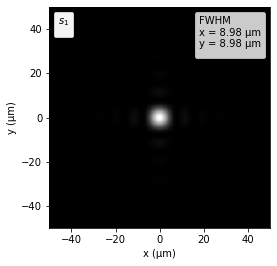

In [11]:
first_lens_f.cut_resample(x_limits=(-50 * um, 50 * um),
                y_limits=(-50 * um, 50 * um),
                num_points=(400, 400),
                new_field=False)


plt.figure(num=None, figsize=(8, 6), dpi=120)
first_lens_f.draw(colormap_kind="gist_gray")
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")

legend1 = plt.legend(title= "FWHM\nx = 8.98 µm\ny = 8.98 µm")

    # Add the first legend to the current axes
plt.gca().add_artist(legend1)



# Create a new legend for specific lines
legend2 = plt.legend(title=r'$s_{1}$', loc='upper left')

# Add the second legend to the current axes
plt.gca().add_artist(legend2)

#Saving Photo
file_name = "lens_1_focus_sim_2D.txt"
plt.savefig(f"{Output_folder_Colli}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

In [5]:
del at_first_lens
   
before_aspheric_lens = first_lens_f.RS(z=2*x ,verbose=True)


at_aspheric = before_aspheric_lens* lens
del before_aspheric_lens
first_lens_f_twice = at_aspheric.RS(z=2*x  ,verbose=True)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 960x720 with 0 Axes>

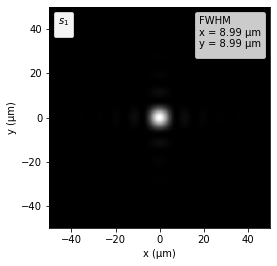

In [14]:
first_lens_f_twice.cut_resample(x_limits=(-50 * um, 50 * um),
                y_limits=(-50 * um, 50 * um),
                num_points=(400, 400),
                new_field=False)


plt.figure(num=None, figsize=(8, 6), dpi=120)
first_lens_f_twice.draw(colormap_kind="gist_gray")
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")

legend1 = plt.legend(title= "FWHM\nx = 8.99 µm\ny = 8.99 µm")

    # Add the first legend to the current axes
plt.gca().add_artist(legend1)



# Create a new legend for specific lines
legend2 = plt.legend(title=r'$s_{1}$', loc='upper left')

# Add the second legend to the current axes
plt.gca().add_artist(legend2)

#Saving Photo
file_name = "after_ideal_lens_2f_sim_2D.txt"
plt.savefig(f"{Output_folder_Colli}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

In [6]:
del at_aspheric
    
before_first_lens_twice = first_lens_f_twice.RS(z=1*(focal_length_first_lens + shift_in_focal_length_first_lens ),verbose=True)
    


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 960x720 with 0 Axes>

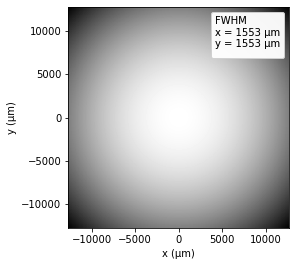

In [32]:
plt.figure(num=None, figsize=(8, 6), dpi=120)
collimated_beam.draw(colormap_kind="gist_gray")
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")

legend1 = plt.legend(title= "FWHM\nx = 1553 µm\ny = 1553 µm")

    # Add the first legend to the current axes
plt.gca().add_artist(legend1)




#Saving Photo
file_name = "before_lens_1_flat_mirror_sim_2D.txt"
plt.savefig(f"{Output_folder_Colli}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')

In [7]:
del first_lens_f_twice
    

at_first_lens_twice = before_first_lens_twice* first_lens

del before_first_lens_twice
                                                
before_second_lens = at_first_lens_twice.RS(z=D1+D2,verbose=True)

del at_first_lens_twice

at_second_lens = before_second_lens * second_lens

del before_second_lens

after_second_lens = at_second_lens.RS(z=focal_length_second_lens + shift_in_focal_length_second_lens )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 960x720 with 0 Axes>

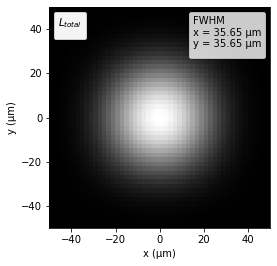

In [8]:
after_second_lens.cut_resample(x_limits=(-50 * um, 50 * um),
                y_limits=(-50 * um, 50 * um),
                num_points=(50, 50),
                new_field=False)


plt.figure(num=None, figsize=(8, 6), dpi=120)
after_second_lens.draw(colormap_kind="gist_gray")
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")

legend1 = plt.legend(title= "FWHM\nx = 35.65 µm\ny = 35.65 µm")

    # Add the first legend to the current axes
plt.gca().add_artist(legend1)



# Create a new legend for specific lines
legend2 = plt.legend(title=r'$L_{total}$', loc='upper left')

# Add the second legend to the current axes
plt.gca().add_artist(legend2)

#Saving Photo
file_name = "50mm_lens_200mm_lens_ideal_sim_2D.txt"
plt.savefig(f"{Output_folder_Colli}/" + file_name.replace(".txt", ".png"), bbox_inches='tight')